# Images in Python

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

### Working with images in python is essentially a visual way of working with 2-d arrays (matrices)

In [2]:
my_matrix = np.array(
[[0, 3, 7, 8, 2, 3],
 [2, 1, 8, 7, 3, 0],
 [4, 9, 3, 2, 9, 2],
 [3, 8, 4, 0, 8, 5],
 [8, 0, 2, 1, 3, 9],
 [9, 2, 4, 2, 4, 8]]
)

In [3]:
my_matrix

array([[0, 3, 7, 8, 2, 3],
       [2, 1, 8, 7, 3, 0],
       [4, 9, 3, 2, 9, 2],
       [3, 8, 4, 0, 8, 5],
       [8, 0, 2, 1, 3, 9],
       [9, 2, 4, 2, 4, 8]])

### All of the normal numpy commands work with matrices (of any dimension)

In [4]:
my_matrix.mean()        # mean of the whole matrix

4.25

### You can work over just the rows or columns of the matrix

* axis = 0 (COLUMNS)
* axis = 1 (ROWS)

In [5]:
my_matrix.mean(axis=0)   # mean of the columns

array([4.33333333, 3.83333333, 4.66666667, 3.33333333, 4.83333333,
       4.5       ])

In [6]:
my_matrix.mean(axis=0)[0]  # mean of the 0th column

4.333333333333333

In [7]:
my_matrix.mean(axis=1)   # mean of the rows

array([3.83333333, 3.5       , 4.83333333, 4.66666667, 3.83333333,
       4.83333333])

In [8]:
my_matrix.flatten()      # convert to 1D (useful for some plotting)

array([0, 3, 7, 8, 2, 3, 2, 1, 8, 7, 3, 0, 4, 9, 3, 2, 9, 2, 3, 8, 4, 0,
       8, 5, 8, 0, 2, 1, 3, 9, 9, 2, 4, 2, 4, 8])

### Math on matrices/images applies to every value

In [9]:
another_matrix = my_matrix + 2

print(another_matrix)

[[ 2  5  9 10  4  5]
 [ 4  3 10  9  5  2]
 [ 6 11  5  4 11  4]
 [ 5 10  6  2 10  7]
 [10  2  4  3  5 11]
 [11  4  6  4  6 10]]


## `.imshow` will display 2-d arrays as images

In [24]:
plt.style.use('ggplot')
plt.rc('axes', grid=False)   # turn off the background grid for images

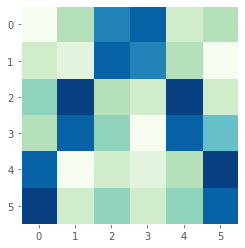

In [25]:
plt.imshow(my_matrix, cmap=plt.cm.GnBu);

### Show the image represenation with a colorbar

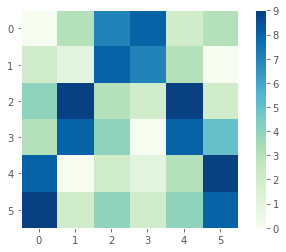

In [12]:
plt.imshow(my_matrix, cmap=plt.cm.GnBu)
plt.colorbar();

### Colormap reference: http://matplotlib.org/examples/color/colormaps_reference.html

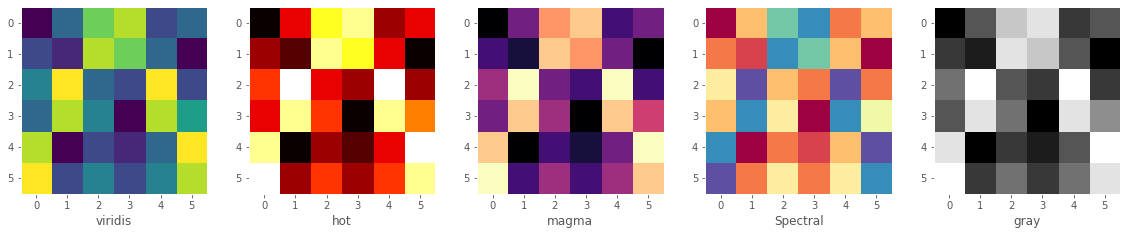

In [27]:
fig, ax = plt.subplots(1,5)

fig.set_size_inches(16,4)

fig.tight_layout()

ax[0].imshow(my_matrix, cmap=plt.cm.viridis)
ax[0].set_xlabel('viridis')

ax[1].imshow(my_matrix, cmap=plt.cm.hot)
ax[1].set_xlabel('hot')

ax[2].imshow(my_matrix, cmap=plt.cm.magma)
ax[2].set_xlabel('magma')

ax[3].imshow(my_matrix, cmap=plt.cm.Spectral)
ax[3].set_xlabel('Spectral')

ax[4].imshow(my_matrix, cmap=plt.cm.gray)
ax[4].set_xlabel('gray');

### Images are just arrays so they can be sliced.

 * The origin is the upper left hand corner `[0,0]`
 * `[Start_Row:End_Row, Start_Column:End_Column]`
   - Start: first element you want
   - End: First element you DON'T want
   - `:`  is the whole range

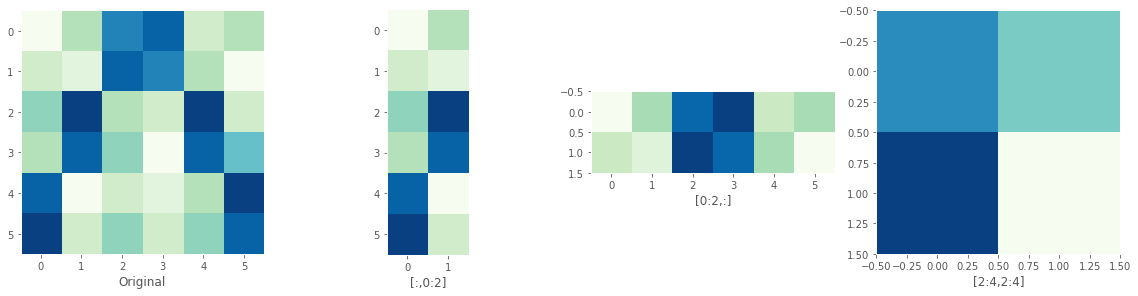

In [14]:
fig, ax = plt.subplots(1,4)
fig.set_size_inches(16,4)

fig.tight_layout()

ax[0].imshow(my_matrix, cmap=plt.cm.GnBu)
ax[0].set_xlabel('Original')

ax[1].imshow(my_matrix[:,0:2], cmap=plt.cm.GnBu)
ax[1].set_xlabel('[:,0:2]')                         # all rows, 2 columns

ax[2].imshow(my_matrix[0:2,:], cmap=plt.cm.GnBu)    # 2 rows, all columns
ax[2].set_xlabel('[0:2,:]')

ax[3].imshow(my_matrix[2:4,2:4], cmap=plt.cm.GnBu);
ax[3].set_xlabel('[2:4,2:4]') ;                     # center

### Images are just arrays so they can be [manipulated](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.array-manipulation.html).

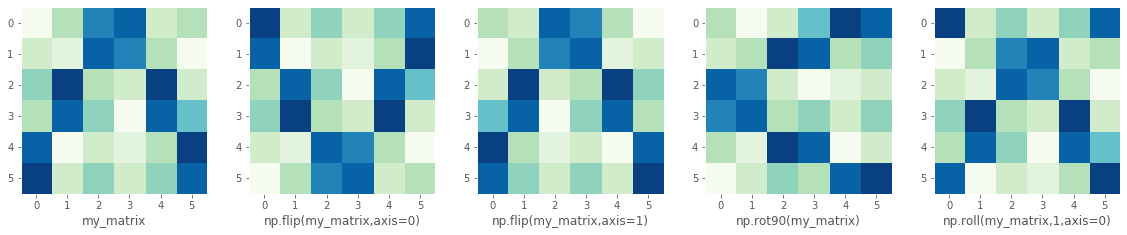

In [15]:
fig, ax = plt.subplots(1,5)
fig.set_size_inches(16,4)

fig.tight_layout()

ax[0].imshow(my_matrix, cmap=plt.cm.GnBu)
ax[0].set_xlabel('my_matrix')

ax[1].imshow(np.flip(my_matrix,axis=0), cmap=plt.cm.GnBu)      # axis = 0 (COLUMNS)
ax[1].set_xlabel('np.flip(my_matrix,axis=0)')

ax[2].imshow(np.flip(my_matrix,axis=1), cmap=plt.cm.GnBu)      # axis = 1 (ROWS)
ax[2].set_xlabel('np.flip(my_matrix,axis=1)')

ax[3].imshow(np.rot90(my_matrix), cmap=plt.cm.GnBu)            # Rotate 90 counter-clockwise
ax[3].set_xlabel('np.rot90(my_matrix)')

ax[4].imshow(np.roll(my_matrix,1,axis=0), cmap=plt.cm.GnBu)    # axis = 0 (COLUMNS)
ax[4].set_xlabel('np.roll(my_matrix,1,axis=0)');

---
### WARNING! Common image formats DO NOT preserve dynamic range of original data!!
- Common image formats: jpg, gif, png, tiff
- Common image formats will re-scale your data values to [0:1]
- Common image formats are **NOT** suitable for scientific data!

In [16]:
# Write my_matrix to a PNG file

plt.imsave('Square.png', my_matrix, cmap=plt.cm.gray)


# Read in the PNG file

my_png = plt.imread('Square.png')

In [17]:
print(f"The original data has a min = {my_matrix.min():.2f} and a max = {my_matrix.max():.2f}")
print(f"The PNG file has a min = {my_png.min():.2f} and a max = {my_png.max():.2f}")

The original data has a min = 0.00 and a max = 9.00
The PNG file has a min = 0.00 and a max = 1.00


---

## [FITS file (Flexible Image Transport System)](https://en.wikipedia.org/wiki/FITS)


* The data format most widely used within astronomy
* Primarily designed to store scientific data sets
  * Multidimensional arrays (images)
  * 2-dimensional tables organized into rows and columns of information.

In [18]:
import astropy.io.fits as fits

## FITS files consist of at least two parts - `Header` and `Data`

* A FITS file is comprised of segments called Header/Data Units (HDUs).
* The first `[0]` HDU is called the `Primary HDU`.
* The primary data array can contain a 1-D spectrum, a 2-D image, or a 3-D data cube.
* Every HDU consists of an ASCII formatted `Header Unit`. 
* Each header unit contains a sequence of fixed-length 80-character keyword (`Cards`)

In [19]:
data_file = "./Data/bsg01.fits"

fits.info(data_file)

Filename: ./Data/bsg01.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   (665, 1000)   float32   


In [20]:
image_data   = fits.getdata(data_file, 0)
image_header = fits.getheader(data_file, 0)

In [21]:
image_header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  665                                                  
NAXIS2  =                 1000                                                  
EXTEND  =                    T                                                  

In [28]:
image_data[0:2]

array([[37.078434, 34.333336, 30.01961 , ..., 58.254906, 58.254906,
        57.470592],
       [19.039217, 18.254902, 17.078432, ..., 58.254906, 58.254906,
        58.254906]], dtype=float32)

In [29]:
print(f"The image has a shape [height,width] of {image_data.shape}")

The image has a shape [height,width] of (1000, 665)


## FITS format preserves the full dynamic range of data

In [30]:
print(f"The image has a maximum value of {image_data.max():.2f}")
print(f"The image has a minimum value of {image_data.min():.2f}")

The image has a maximum value of 101.00
The image has a minimum value of 0.04


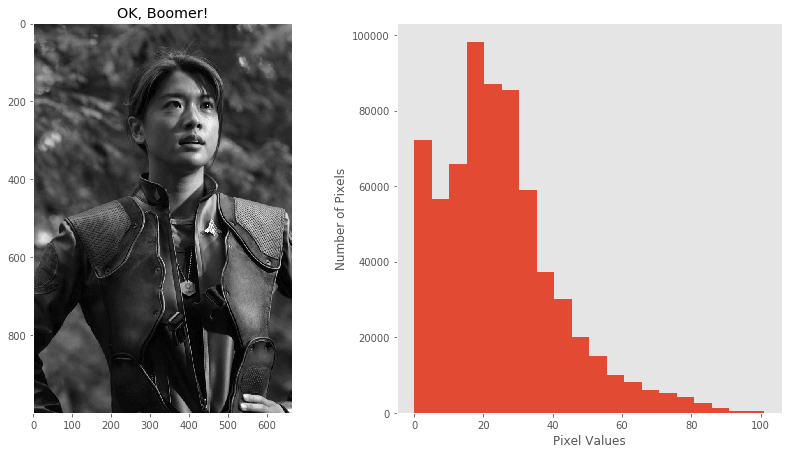

In [31]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(12,6)
fig.tight_layout()

ax[0].imshow(image_data,cmap=plt.cm.gray)
ax[0].set_title("OK, Boomer!")

ax[1].set_xlabel("Pixel Values")
ax[1].set_ylabel("Number of Pixels")
ax[1].hist(image_data.flatten(),bins=20);

## Modifying pixel values

In [32]:
copy_data = np.copy(image_data)        # make a copy of the data to work with

copy_data.min(), copy_data.mean(), copy_data.max()

(0.039215688, 24.951511, 101.0)

#### Set all pixel_values > 2 * mean pixel_value to pixel_value maximum

In [33]:
copy_data[copy_data > 2 * copy_data.mean()] = copy_data.max()

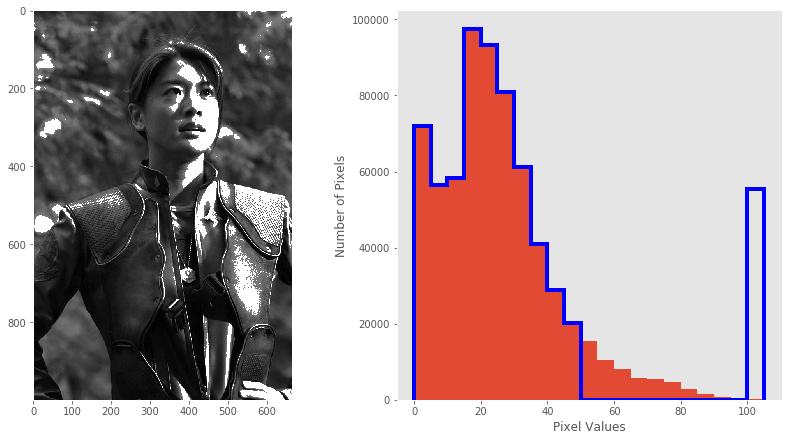

In [34]:
fig, ax = plt.subplots(1,2)

fig.set_size_inches(12,6)

fig.tight_layout()

ax[0].imshow(copy_data,cmap=plt.cm.gray)

my_bins = np.arange(0,110,5)

ax[1].set_xlabel("Pixel Values")
ax[1].set_ylabel("Number of Pixels")
ax[1].hist(image_data.flatten(), bins=my_bins)
ax[1].hist(copy_data.flatten(), bins=my_bins, histtype = "step", linewidth = "4", color = "b");

## You can add and subtract images

In [35]:
another_image_file = "./Data/bsg02.fits"

another_image_data = fits.getdata(another_image_file)     # a quick way to just get the data

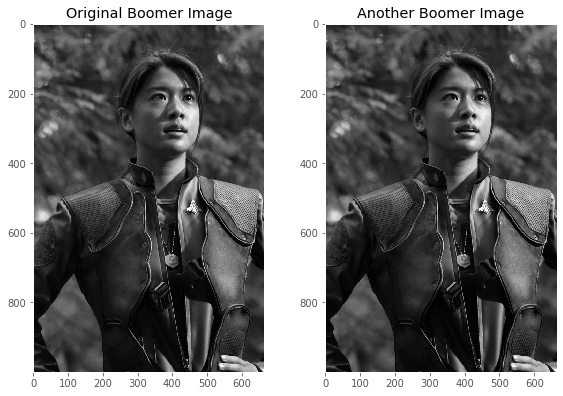

In [36]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(8,6)

fig.tight_layout(w_pad = 3.0)

ax[0].set_title("Original Boomer Image")
ax[1].set_title("Another Boomer Image")

ax[0].imshow(image_data, cmap=plt.cm.gray)
ax[1].imshow(another_image_data, cmap=plt.cm.gray);

## The two images above may look the same but they are not!

### Subtracting the two images reveals the truth.

In [37]:
real_image = image_data - another_image_data                 # Subtract the images pixel by pixel

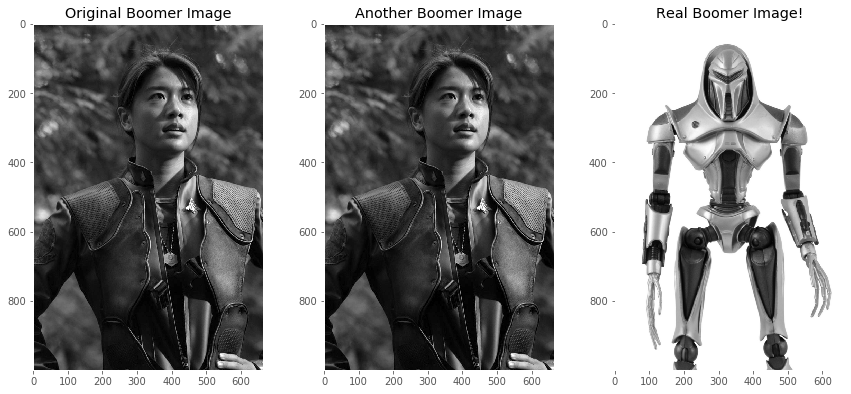

In [38]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(12,6)

fig.tight_layout(w_pad = 3.0)

ax[0].set_title("Original Boomer Image")
ax[1].set_title("Another Boomer Image")
ax[2].set_title("Real Boomer Image!")

ax[0].imshow(image_data, cmap=plt.cm.gray)
ax[1].imshow(another_image_data, cmap=plt.cm.gray);
ax[2].imshow(real_image, cmap=plt.cm.gray);

In [39]:
print(f"The real image has a maximum value of {real_image.max():.2f}")
print(f"The real image has a minimum value of {real_image.min():.2f}")

The real image has a maximum value of 1.00
The real image has a minimum value of 0.02


---
## FITS Images - An astronomical example

In [40]:
data_file = "./Data/M51_Blue.fits"

fits.info(data_file)

Filename: ./Data/M51_Blue.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     128   (1188, 1190)   int16   


In [41]:
object_data   = fits.getdata(data_file, 0)
object_header = fits.getheader(data_file, 0)

In [42]:
print(f"Image min  = {object_data.min():9.1f}")
print(f"Image max  = {object_data.max():9.1f}")
print(f"Image mean = {object_data.mean():9.1f}")
print(f"Image std  = {object_data.std():9.1f}")

Image min  =    1360.0
Image max  =   21607.0
Image mean =    5618.6
Image std  =    2979.7


#### Notice the VERY wide range of pixel values (dynamic range)

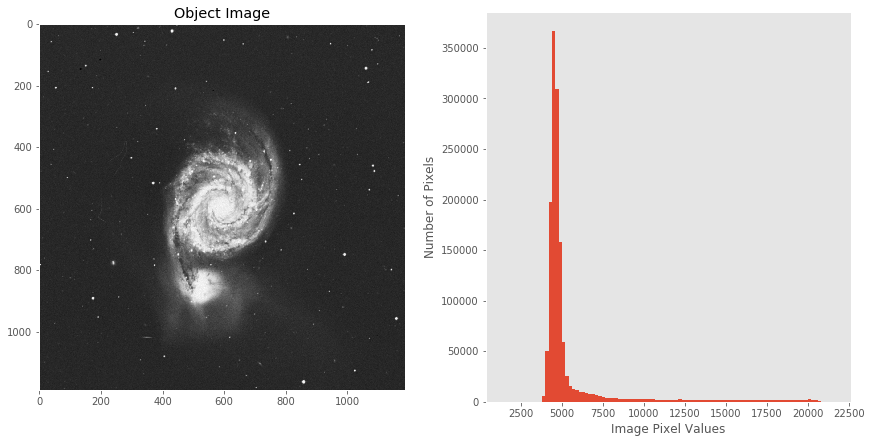

In [43]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(12,6)
fig.tight_layout(w_pad = 5)

ax[0].set_title("Object Image")
ax[0].imshow(object_data, cmap=plt.cm.gray)

ax[1].set_xlabel("Image Pixel Values")
ax[1].set_ylabel("Number of Pixels")
ax[1].hist(object_data.flatten(),bins=100);

##### Notice the origin is in the upper left corner (the image is upside down)

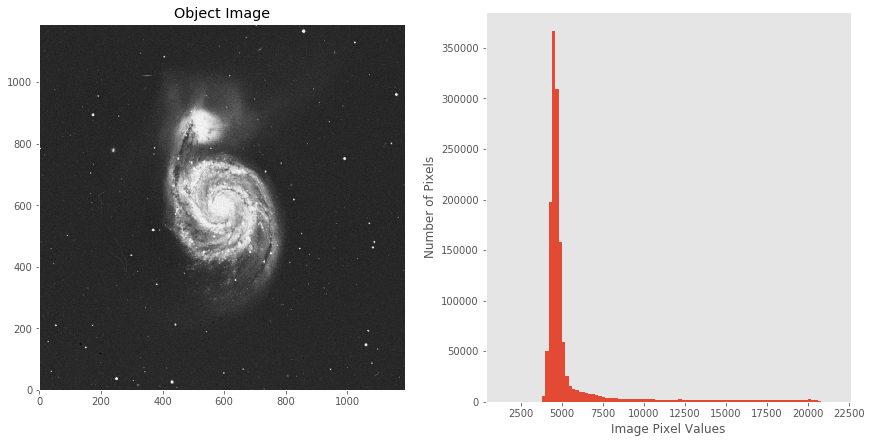

In [44]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(12,6)
fig.tight_layout(w_pad = 5)

ax[0].set_title("Object Image")
ax[0].imshow(object_data, cmap=plt.cm.gray, origin = "lower")

ax[1].set_xlabel("Image Pixel Values")
ax[1].set_ylabel("Number of Pixels")
ax[1].hist(object_data.flatten(),bins=100);

##### Better, the origin is in the lower left corner

---
## World Coordinate System `WCS`

* Most FITS images contain coordinate information
* This information is part of the FITS header

In [45]:
from astropy.wcs import WCS

In [46]:
my_wcs = WCS(object_header) # Ignore the warning

 [astropy.io.fits.verify]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
Changed DATE-OBS from '1994/06/03        ' to '1994-06-03T00:00:00.0''. [astropy.wcs.wcs]


In [47]:
my_wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 203.54862235000004  44.78468707777778  
CRPIX : -2078.4985886335744  -8022.499179245751  
PC1_1 PC1_2  : 0.015028943772774814  -9.871414345846347e-05  
PC2_1 PC2_2  : 0.00010093008182627984  0.01499985225052323  
CDELT : -0.018647023718654013  0.018647023718654013  
NAXIS : 1188  1190

#### To plot the coordinates on your image you have to use a different version of the `subplot` command

* You have to define EACH axes with a `fig.add_subplot()` command

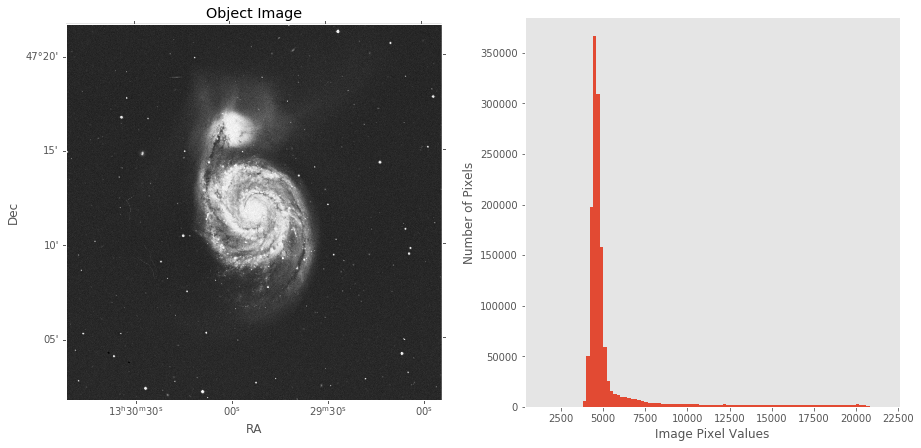

In [48]:
fig = plt.figure()

ax1 = fig.add_subplot(121, projection = my_wcs)
ax2 = fig.add_subplot(122)

fig.set_size_inches(12,6)
fig.tight_layout(w_pad = 6)

ax1.set_title("Object Image")
ax1.set_xlabel("RA")
ax1.set_ylabel("Dec")
ax1.imshow(object_data, cmap=plt.cm.gray,
           origin="lower")

ax2.set_xlabel("Image Pixel Values")
ax2.set_ylabel("Number of Pixels")
ax2.hist(object_data.flatten(),bins=100);